#### *SOURCE: CLARUSWAY, INSTRUCTOR: JasonTimberlake (Statistics)*

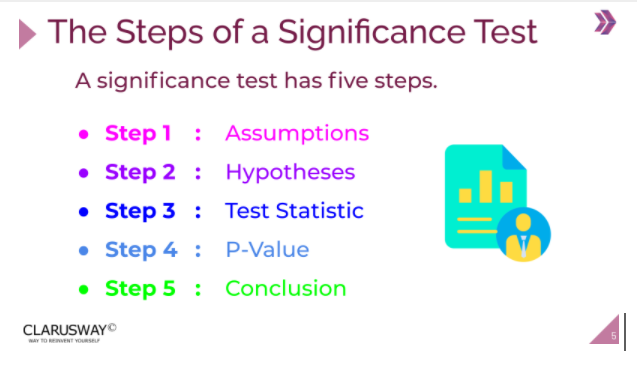

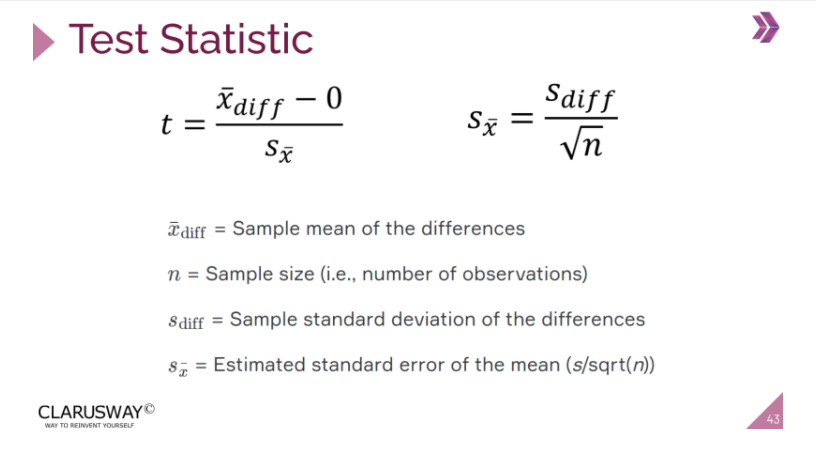

<div>
<img src="attachment:teststatistic.png" width="500"/>
</div>

***

In [1]:
# Basic Library
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats

import warnings;
warnings.filterwarnings('ignore')

***

<div class="alert alert-block alert-danger">
    
<b>Paired (Dependent) Samples T Test *(Two-Tailed)*</b>
    
</div>

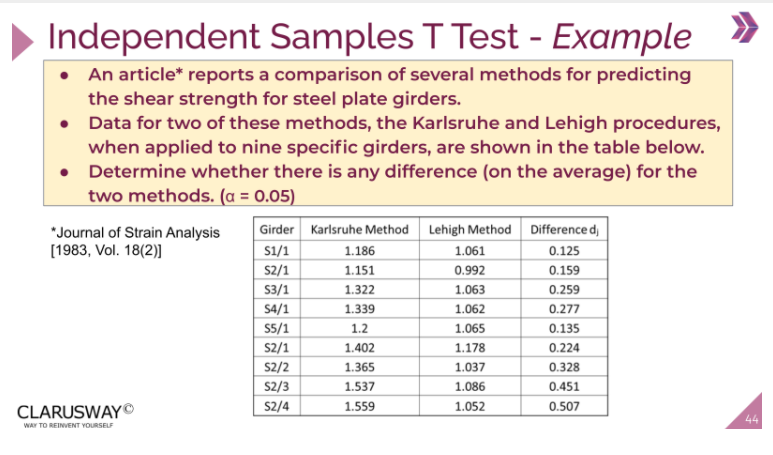

In [2]:
x = [1.186, 1.151, 1.322, 1.339, 1.2, 1.402, 1.365, 1.537, 1.559]
y = [1.061, 0.992, 1.063, 1.062, 1.065, 1.178, 1.037, 1.086, 1.052]
z = [0.125, 0.159, 0.259, 0.277, 0.135, 0.224, 0.328, 0.451, 0.507]

shear = pd.DataFrame({"Karlsruhe Method":x, "Lehigh Method":y, "Difference":z})
shear

,Karlsruhe Method,Lehigh Method,Difference
0,1.186,1.061,0.125
1,1.151,0.992,0.159
2,1.322,1.063,0.259
3,1.339,1.062,0.277
4,1.200,1.065,0.135
5,1.402,1.178,0.224
6,1.365,1.037,0.328
7,1.537,1.086,0.451
8,1.559,1.052,0.507


In [10]:
# PAIRED SAMPLES T-TEST ASSUMPTIONS
# The three basic assumptions of a test about difference between means are as follows:

- The dependent variable is continuous
- Observations are independent of one another
- Approximately normal population distribution for each group

In [ ]:
# HYPOTHESIS

- H0: d_bar = 0   (d : difference)
- H1: d_bar != 0  

In [3]:
# TEST STATISTIC

t0 = shear.Difference.mean() / (shear.Difference.std() / (9**0.5))
t0

6.081939437584823

In [4]:
# P-VALUE

pValue = 2 * (1 - stats.t.cdf(t0, 8))  # two tails and multiply 2
pValue

0.00029529546278617147

In [5]:
# Calculate test statistics using stats.ttest_rel()

pairedtest = stats.ttest_rel(shear['Karlsruhe Method'], shear['Lehigh Method'], alternative='two-sided')
pairedtest

Ttest_relResult(statistic=6.0819394375848255, pvalue=0.00029529546278604066)

In [6]:
# CONCLUSION (DECISION)

alpha = 0.05  # significance level

if pValue < alpha:
    print("Reject the Null")
else:
    print("Fail to Reject the Null")

Reject the Null


In [ ]:
# The data indicate that the Karlsruhe method produces, on the average, higher strength predictions
# than does the Lehigh method.

***

<div class="alert alert-block alert-danger">
    
<b>Paired (Dependent) Samples T Test *(One-Tailed)*</b>
    
</div>

### Prozac Data

- Let us consider a simple example of what is often termed "pre/post" data or "pretest/posttest" data. 
- Suppose you wish to test the effect of Prozac on the well-being of depressed individuals, using a standardised "well-being scale" that sums Likert-type items to obtain a score that could range from 0 to 20. 
- Higher scores indicate greater well-being (that is, Prozac is having a positive effect). 
- While there are flaws in this design (e.g., lack of a control group) it will serve as an example of how to analyse such data.

Determine if Prozac enhances well-being in depressed individuals. Use   0.05

In [7]:
# read prozac dataset
prozac = pd.read_csv("Data/prozac.csv")

In [8]:
prozac

,moodpre,moodpost,difference
0,3,5,2
1,0,1,1
2,6,5,-1
3,7,7,0
4,4,10,6
5,3,9,6
6,2,7,5
7,1,11,10
8,4,8,4


In [ ]:
# HYPOTHESIS

- H0: d_bar = 0  (d : difference)
- H1: d_bar > 0  

In [ ]:
# Calculate test statistics using stats.ttest_rel()  

In [9]:
# moodpost - moodpre

pairedtest = stats.ttest_rel(prozac.moodpost, prozac.moodpre, alternative='greater')
pairedtest

Ttest_relResult(statistic=3.1428571428571423, pvalue=0.006872912197394246)

In [10]:
# moodpre - moodpost

# H0: d_bar = 0
# H1: dbar < 0

stats.ttest_rel(prozac.moodpre, prozac.moodpost, alternative='less')

Ttest_relResult(statistic=-3.1428571428571423, pvalue=0.006872912197394246)

In [11]:
# Decision
alpha = 0.05

if pairedtest.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null
